# Ejercicio PCA (Principal Component Analysis)
En este ejercicio vas a trabajar con un dataset de información de ciudadanos como el estado civil, número de hijos, qué gastos e ingresos tiene, etc...

Se cuenta con un target, que es si el ciudadano va a alquilar o a comprar una vivienda. Para ello,  con PCA

### Importamos librerias
Principales librerías que usarás durante el notebook.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings

filterwarnings('ignore')


### Cargamos datos de entrada
1. Carga el csv *comprar_alquilar.csv*
2. Obtén la información básica: columnas, dimensiones, descripción de las variables, missings...

In [2]:
df = pd.read_csv('./data/comprar_alquilar.csv')
df.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


In [4]:
df.describe()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,971.584158,211.742574,515.425743,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683
std,1682.862556,272.106351,124.940754,168.103075,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988
min,2008.000000,384.000000,0.000000,201.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000
25%,3513.750000,766.750000,99.000000,383.250000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000
50%,4947.500000,968.000000,208.500000,522.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000
75%,6374.500000,1165.250000,318.750000,656.750000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000
max,7984.000000,1585.000000,448.000000,828.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000


In [5]:
df.nunique()

ingresos          199
gastos_comunes    188
pago_coche        160
gastos_otros      175
ahorros           202
vivienda          202
estado_civil        3
hijos               5
trabajo             9
comprar             2
dtype: int64

In [6]:
df.columns.values

array(['ingresos', 'gastos_comunes', 'pago_coche', 'gastos_otros',
       'ahorros', 'vivienda', 'estado_civil', 'hijos', 'trabajo',
       'comprar'], dtype=object)

In [7]:
cat_cols = ['estado_civil', 'hijos', 'trabajo']
no_cols = ['ingresos', 'gastos_comunes', 'pago_coche', 'gastos_otros',
       'ahorros', 'vivienda']
target = 'comprar'

### Visualicemos las dimensiones
Realiza un análisis univariante. Realiza la gráfica que consideres para cada variable, diferenciando por colores el target (*comprar*).

In [8]:
num_cols = ['ingresos', 'gastos_comunes', 'pago_coche', 'gastos_otros', 'ahorros']
cat_cols = ['vivienda', 'estado_civil', 'hijos', 'trabajo']
target = 'comprar'

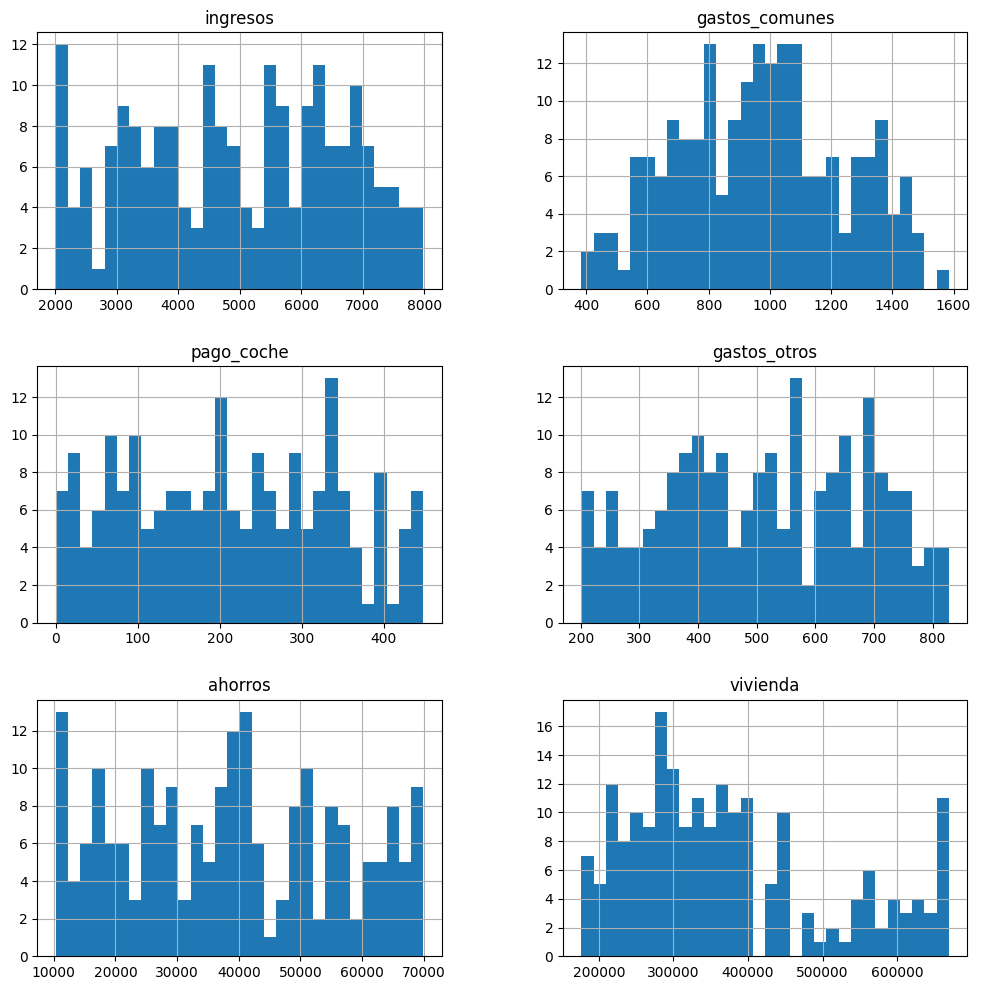

In [9]:
df[no_cols].hist(bins=30, figsize=(12,12));

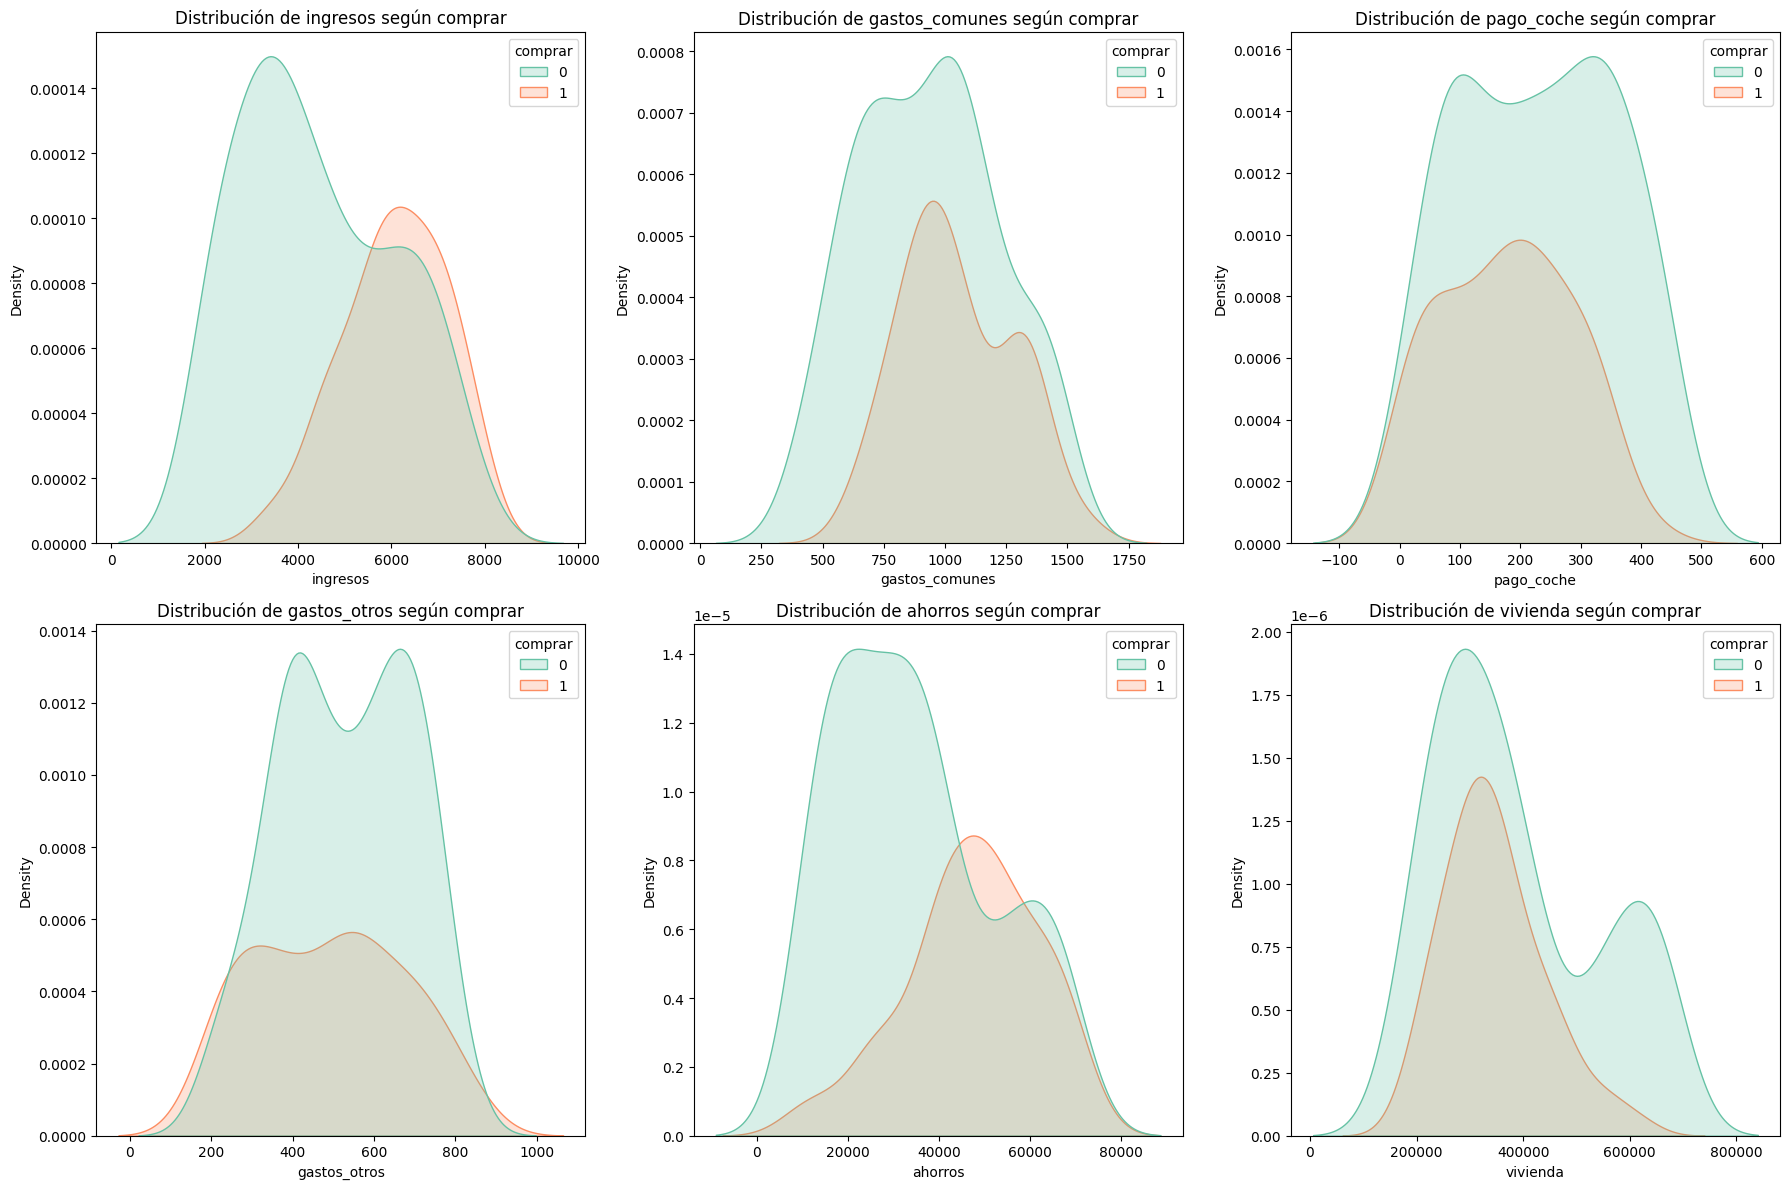

In [10]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(no_cols):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(data=df, x=col, hue=target, fill=True, palette='Set2')
    plt.title(f'Distribución de {col} según {target}')
plt.tight_layout()
plt.show()

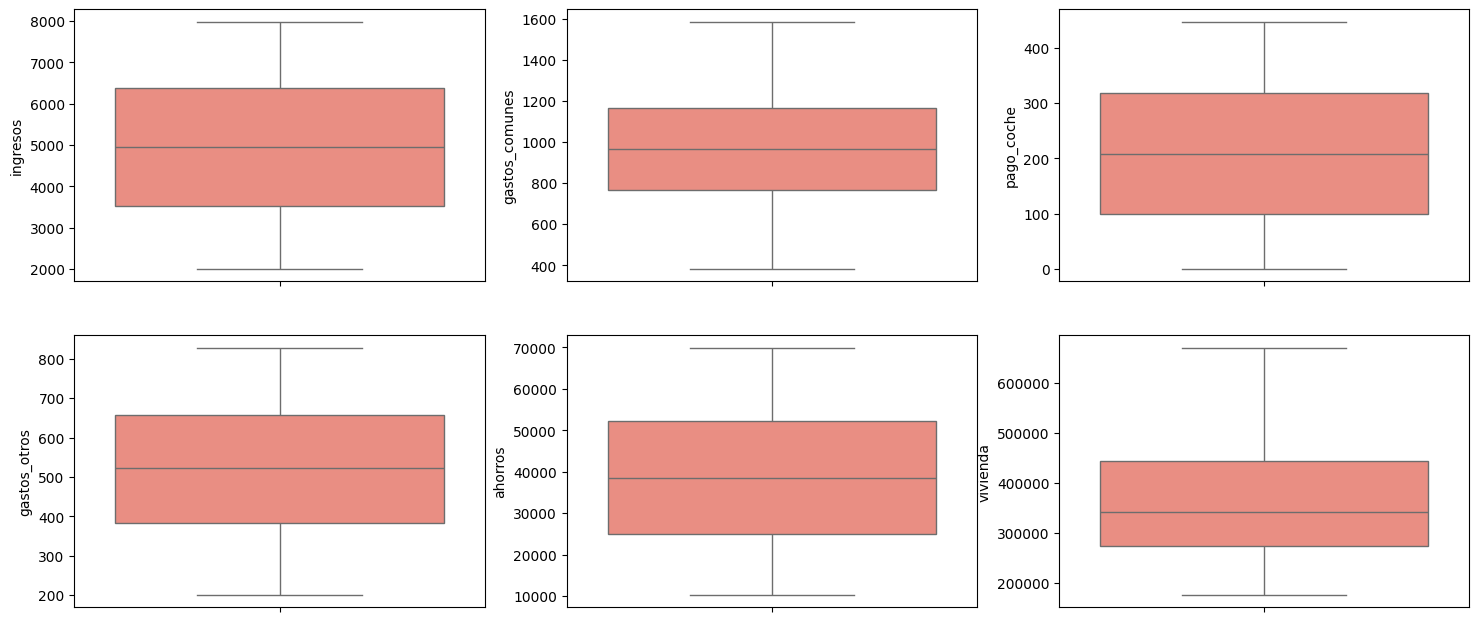

In [11]:
plt.figure(figsize=(18, 12))
for i in range(len(df[no_cols].columns.values)):
    if i == 9:
        break
    plt.subplot(3, 3, i+1)
    sns.boxplot(df[df[no_cols].columns.values[i]], color='salmon')

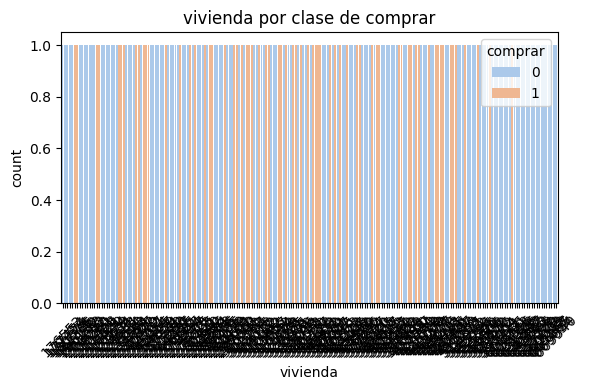

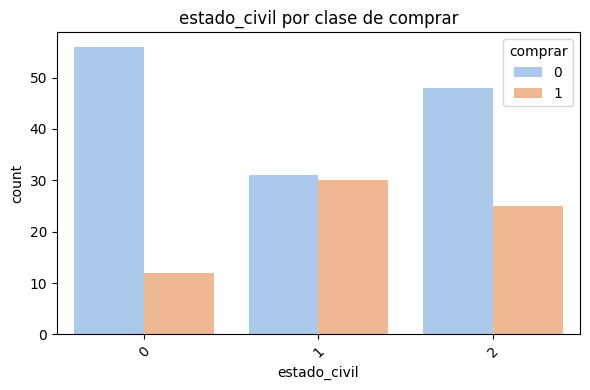

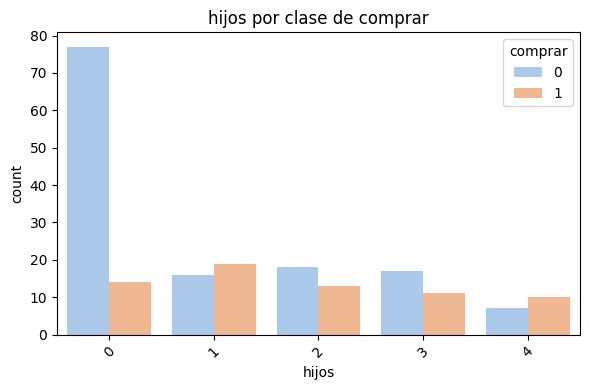

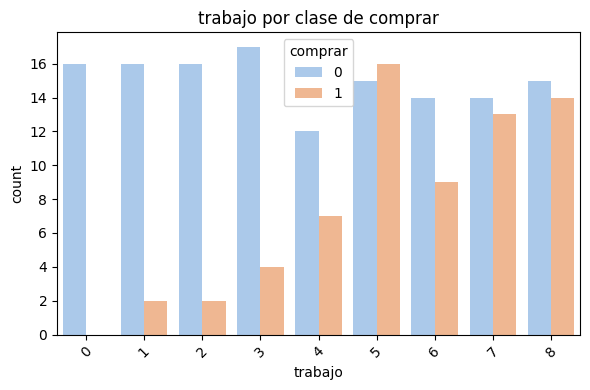

In [12]:
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue=target, palette='pastel')
    plt.title(f'{col} por clase de {target}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [13]:
df_encoded = pd.get_dummies(df, columns=['estado_civil', 'hijos', 'trabajo'], drop_first=True)
df_encoded.head()


,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,comprar,estado_civil_1,estado_civil_2,hijos_1,...,hijos_3,hijos_4,trabajo_1,trabajo_2,trabajo_3,trabajo_4,trabajo_5,trabajo_6,trabajo_7,trabajo_8
0,6000,1000,0,600,50000,400000,1,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,6745,944,123,429,43240,636897,0,True,False,False,...,True,False,False,False,False,False,False,True,False,False
2,6455,1033,98,795,57463,321779,1,False,True,True,...,False,False,False,False,False,False,False,False,False,True
3,7098,1278,15,254,54506,660933,0,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,6167,863,223,520,41512,348932,1,False,False,False,...,False,False,False,False,True,False,False,False,False,False


## Estandariza los datos
Como el objetivo de estos primeros apartados no es encontrar el mejor modelo con el mejor accuracy, por sencillez, no es necesario dividir en train y test.

In [14]:
X = df_encoded.drop(columns='comprar', axis=1)
y = df[target]

In [15]:
ss = StandardScaler()
X_ss = ss.fit_transform(X)

## Aplicamos PCA
Aplica el algoritmo de PCA para 9 components, es decir, para todas las features

In [16]:
pca = PCA(n_components=9)
pca.fit(X)

PCA(n_components=9)

### Veamos cómo de buenos predictores son las nuevas dimensiones
Responde a las siguientes preguntas:
1. ¿Cuánta varianza explica cada Principal Component?
2. ¿Y de manera acumulada empezando por el PC1?
3. ¿Cuánta varianza explicarían sólo 5 componentes?

In [17]:
# 1.
pca.explained_variance_

array([1.87100995e+10, 1.90241718e+08, 1.26650961e+06, 4.37981722e+04,
       2.77324833e+04, 1.49468202e+04, 3.32298532e-01, 2.39794338e-01,
       1.72977297e-01])

In [18]:
# 2.
pca.explained_variance_ratio_.cumsum()

array([0.98986362, 0.99992842, 0.99999542, 0.99999774, 0.99999921,
       1.        , 1.        , 1.        , 1.        ])

In [19]:
# 3.
pca.explained_variance_ratio_.cumsum()[4]

np.float64(0.9999992091452143)

### Graficamos la variacion explicada acumulada
Representa en un diagrama de lineas la evolución de la varianza acumulada en función de los PC

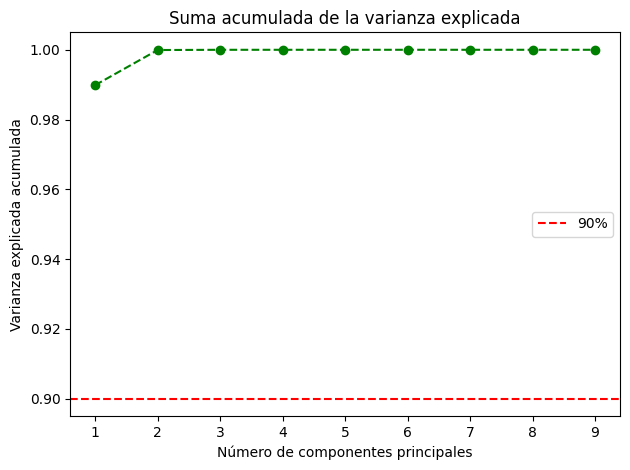

In [21]:
varianza_acc = pca.explained_variance_ratio_.cumsum()

plt.plot(range(1, len(varianza_acc) + 1),varianza_acc, marker='o', linestyle='--', color='g')
plt.title('Suma acumulada de la varianza explicada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(False)
plt.axhline(y=0.90, color='r', linestyle='--', label='90%')
plt.legend()
plt.tight_layout()

plt.show()

### Veamos la correlación entre las nuevas componentes y las dimensiones originales
Representa en un mapa de calor los PCA vs las variables originales. Esta información la puedes obtener del atributo de PCA *components_*.

In [22]:
X.columns

Index(['ingresos', 'gastos_comunes', 'pago_coche', 'gastos_otros', 'ahorros',
       'vivienda', 'estado_civil_1', 'estado_civil_2', 'hijos_1', 'hijos_2',
       'hijos_3', 'hijos_4', 'trabajo_1', 'trabajo_2', 'trabajo_3',
       'trabajo_4', 'trabajo_5', 'trabajo_6', 'trabajo_7', 'trabajo_8'],
      dtype='object')

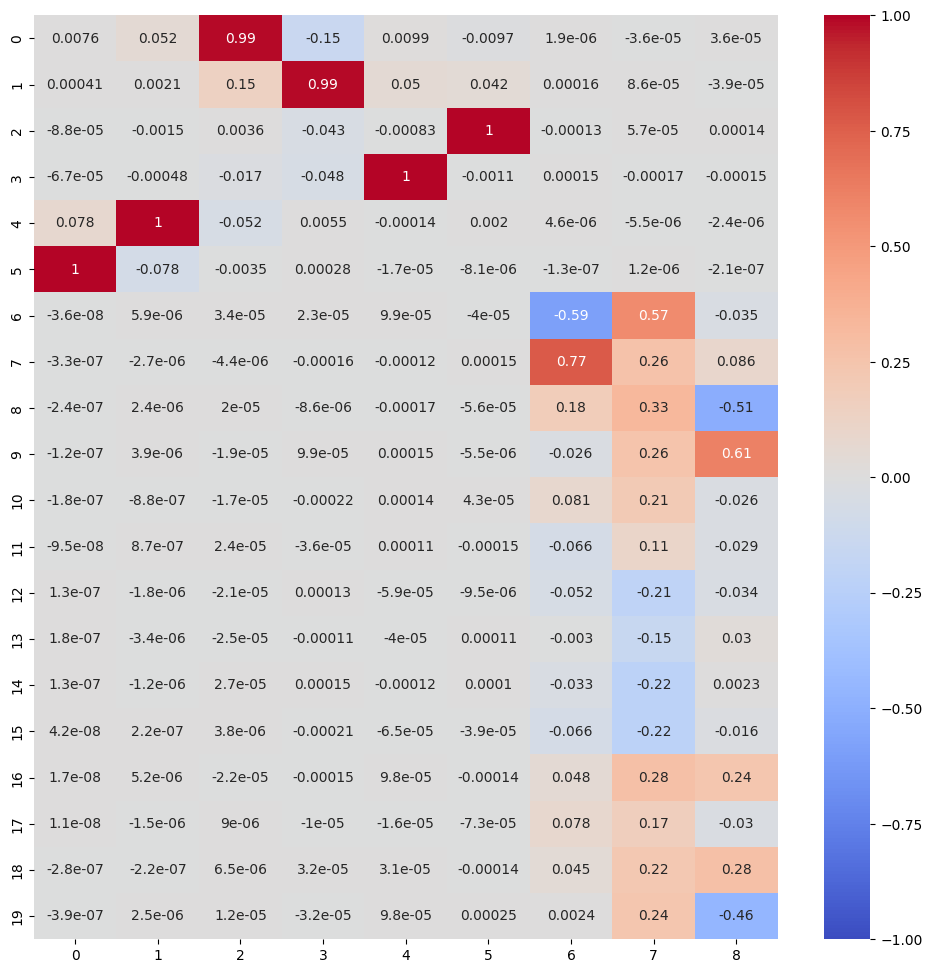

In [23]:
plt.figure(figsize=(12,12))
sns.heatmap(pca.components_.T, annot=True, vmax=1, vmin=-1, cmap='coolwarm');

## Predicciones
1. Divide en train y test
2. Prepara un pipeline compuesto por:
    - StandardScaler,
    - PCA de 5 componentes
    - Un clasificador
3. Entrena
4. Predice con test
5. Calcula el accuracy score en train y test
6. Representa la matriz de confusión
7. ¿Qué combinación de parámetros y componentes mejoraría el accuracy en test?
8. Vuelve a iterar de nuevo con un gridsearch
9. Guarda tu mejor modelo

In [25]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=.2, random_state=10)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(161, 20)
(161,)
(41, 20)
(41,)


In [29]:
pipeline = Pipeline([
    ("pca", PCA(n_components=5,  random_state=10)), # Utiliza solo X_train
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=10)),# Utiliza X_train, y_train
])
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

acc_train = pipeline.score(X_train, y_train)
acc_test = pipeline.score(X_test, y_test)

print('acc train', acc_train)
print('acc test', acc_test)

acc train 0.8819875776397516
acc test 0.9024390243902439


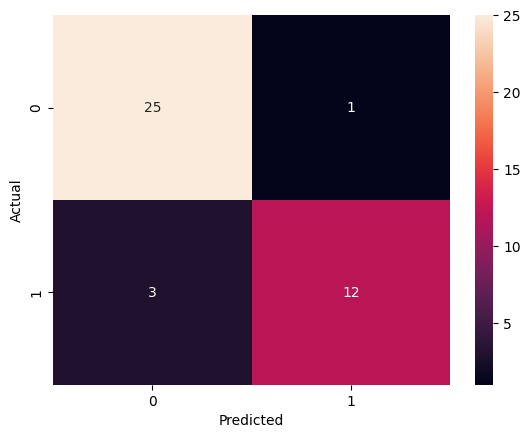

In [30]:
c_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(c_matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [33]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model_pca", PCA()),
    ("model_lr", LogisticRegression())
])

params = [{
    "scaler": [StandardScaler()],
    "model_pca": [PCA(random_state=10)],
    "model_pca__n_components": [1, 2, 5],
}, {
    "scaler": [StandardScaler()],
    "model_lr": [LogisticRegression(random_state=10)],
    "model_lr__max_iter": [250, 500, 1000],    
}]

gscv = GridSearchCV(pipeline, params, scoring="accuracy", cv = 5, verbose=3, n_jobs=1)
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END model_pca=PCA(random_state=10), model_pca__n_components=1, scaler=StandardScaler();, score=0.667 total time=   0.0s
[CV 2/5] END model_pca=PCA(random_state=10), model_pca__n_components=1, scaler=StandardScaler();, score=0.625 total time=   0.0s
[CV 3/5] END model_pca=PCA(random_state=10), model_pca__n_components=1, scaler=StandardScaler();, score=0.625 total time=   0.0s
[CV 4/5] END model_pca=PCA(random_state=10), model_pca__n_components=1, scaler=StandardScaler();, score=0.625 total time=   0.0s
[CV 5/5] END model_pca=PCA(random_state=10), model_pca__n_components=1, scaler=StandardScaler();, score=0.656 total time=   0.0s
[CV 1/5] END model_pca=PCA(random_state=10), model_pca__n_components=2, scaler=StandardScaler();, score=0.879 total time=   0.0s
[CV 2/5] END model_pca=PCA(random_state=10), model_pca__n_components=2, scaler=StandardScaler();, score=0.719 total time=   0.0s
[CV 3/5] END model_pca=PCA(random_sta

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model_pca', PCA()),
                                       ('model_lr', LogisticRegression())]),
             n_jobs=1,
             param_grid=[{'model_pca': [PCA(random_state=10)],
                          'model_pca__n_components': [1, 2, 5],
                          'scaler': [StandardScaler()]},
                         {'model_lr': [LogisticRegression(random_state=10)],
                          'model_lr__max_iter': [250, 500, 1000],
                          'scaler': [StandardScaler()]}],
             scoring='accuracy', verbose=3)

In [34]:
gscv.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model_pca', PCA()),
                ('model_lr',
                 LogisticRegression(max_iter=250, random_state=10))])

In [35]:
gscv.best_params_

{'model_lr': LogisticRegression(random_state=10),
 'model_lr__max_iter': 250,
 'scaler': StandardScaler()}

In [40]:
with open('pca_alquiler_compra.pkl', 'wb') as f:
    pkl.dump(gscv.best_estimator_, f)